<a href="https://colab.research.google.com/github/sks9699/Api/blob/master/leaf_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d sks9699/species-of-leaf

100% 6.56G/6.56G [01:14<00:00, 175MB/s]
100% 6.56G/6.56G [01:14<00:00, 94.3MB/s]


In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/species-of-leaf.zip','r')
zip_ref.extractall('/content/')
zip_ref.close()

In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [14]:
pip install split-folders

In [15]:
import splitfolders
IMAGE_SIZE = [224, 224]

In [16]:
import splitfolders

In [17]:
splitfolders.ratio("/content/leaf",
                   output="./output",
                   seed=42,
                   ratio=(.7, .2, .1),
                   group_prefix=None,
                   move=False
                  )

Copying files: 4502 files [00:58, 76.53 files/s]


In [18]:
train_directory ='/content/output/train'
test_directory ='/content/output/test'
val_directory ='/content/output/val'

In [12]:
# import shutil

# # Specify the directory you want to delete
# directory_to_delete = "/content/dataset"

# # Use shutil.rmtree() to recursively remove the directory and its contents
# shutil.rmtree(directory_to_delete)

# print("Directory deleted successfully.")


Directory deleted successfully.


In [19]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights ='imagenet',include_top = False)
for layer in vgg.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [22]:
folders = glob('/content/output/train')
len(folders)

1

In [29]:
x = Flatten()(vgg.output)
prediction = Dense(12, activation='softmax')(x)

In [30]:
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [31]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']  # Change 'metrices' to 'metrics'
)


In [32]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range =0.2,
                                  zoom_range =0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size =(224,224),
                                                 batch_size = 32,
                                                 class_mode ='categorical'
                                                )

test_set = test_datagen.flow_from_directory(test_directory,
                                                 target_size =(224,224),
                                                 batch_size = 32,
                                                 class_mode ='categorical'
                                                )

Found 3146 images belonging to 12 classes.
Found 462 images belonging to 12 classes.


In [33]:
print(len(training_set))
print(len(test_set))

99
15


In [34]:
r = model.fit_generator(
    training_set,
#     steps_per_epochs=16,
    validation_data=test_set,
    epochs =5,
    # steps_per_epoch=16,
    # validation_steps=len(test_set)
)

<ipython-input-34-102af20b1223>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
99/99 [==============================] - 1567s 16s/step - loss: 1.1224 - accuracy: 0.6618 - val_loss: 0.5240 - val_accuracy: 0.8420
Epoch 2/5
99/99 [==============================] - 1624s 16s/step - loss: 0.4643 - accuracy: 0.8516 - val_loss: 0.4007 - val_accuracy: 0.8874
Epoch 3/5
99/99 [==============================] - 1559s 16s/step - loss: 0.3461 - accuracy: 0.8926 - val_loss: 0.2939 - val_accuracy: 0.9113
Epoch 4/5
99/99 [==============================] - 1566s 16s/step - loss: 0.2404 - accuracy: 0.9285 - val_loss: 0.2558 - val_accuracy: 0.9199
Epoch 5/5
99/99 [==============================] - 1568s 16s/step - loss: 0.2143 - accuracy: 0.9313 - val_loss: 0.2982 - val_accuracy: 0.8961


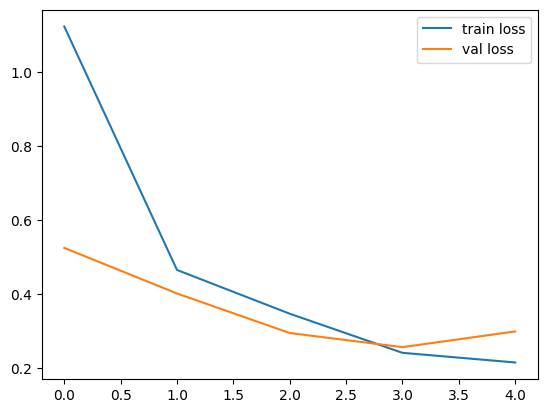

In [40]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [57]:
import numpy as np

max_accuracy_index = np.argmax(r.history['accuracy'])
max_accuracy_value = r.history['accuracy'][max_accuracy_index]
print("Maximum training accuracy:", max_accuracy_value*100)


Maximum training accuracy: 93.13414096832275


In [36]:
# Save the model
model.save('my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
# Define the list of class names
CLASS = ['Alstonia Scholaris', 'Arjun', 'Bael', 'Basil', 'Chinar', 'Gauva', 'Jamun', 'Jatropha', 'Lemon', 'Mango', 'Pomegranate', 'Pongamia Pinnata']

# Create a dictionary mapping class indices to class names
class_names = {i: CLASS[i] for i in range(len(CLASS))}


In [45]:
# Assuming you have an image you want to make predictions on
# Here, `image_path` is the path to the image you want to predict
# You can load the image using keras.preprocessing.image module
from keras.preprocessing import image
import numpy as np

# Load the image
img = image.load_img("/content/output/test/Lemon (P10)/0010_0060.JPG", target_size=(224, 224))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.  # Normalize the image data

# Make prediction
prediction = model.predict(img_array)

# Get the predicted class label
predicted_class = np.argmax(prediction)

# Print the predicted class
predicted_class_name = class_names[predicted_class]
print("Predicted class name:", predicted_class_name)



1/1 [==============================] - 0s 360ms/step
Predicted class name: Lemon
